La idea es comparar diferentes intervalos de confianza para el parametro $p$ 

### 1.- $\{ p:|\frac{\hat{p}-p}{\sqrt{p(1-p)/n}}|\le z_{\alpha/2}\}$

### 2.- $\{p:|\frac{\hat{p}-p}{\sqrt{\hat{p}(1-\hat{p})/n}}|\le z_{\alpha/2}\}$

### 3.- $\{p:-2\log\left(\frac{p^y(1-p)^{n-y}}{\hat{p}^y(1-\hat{p})^{n-y}}\right)\le \chi_{\alpha}\}$

In [9]:
from __future__ import division
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import numpy as np
from math import sqrt,log
%matplotlib inline

In [2]:
z_a = -st.norm.ppf(0.05)
xi_a = st.chi.ppf(q=0.99,df=1)

In [6]:
np.linspace(4,15,5)

array([ 4.  ,  6.75,  9.5 , 12.25, 15.  ])

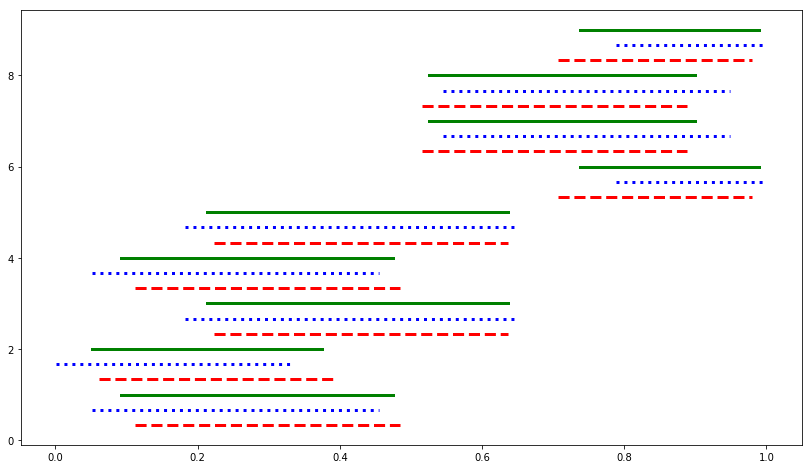

In [15]:
plt.figure(figsize=(14,8))
for p,i in zip(np.linspace(0.1,0.9,9),range(10)):    
    n =12
    X = np.random.choice([0,1],p=[1-p,p],size=n)
    p_hat = X.mean()
    X_sum = X.sum()
    I_1=[p_0 for p_0 in np.linspace(0.001,0.9999,100) if abs((p_hat-p_0)/sqrt(p_0*(1-p_0)/n))<z_a]
    I_2=[p_0 for p_0 in np.linspace(0.001,0.9999,100) if abs((p_hat-p_0)/sqrt(p_hat*(1-p_hat)/n))<z_a]
    I_3=[p_0 for p_0 in np.linspace(0.001,0.9999,100) if -2*log(((p_0**X_sum)*(1-p_0)**(n-X_sum))/((p_hat**X_sum)*(1-p_hat)**(n-X_sum))) < xi_a]
    plt.plot([min(I_1),max(I_1)],[i+1/3,i+1/3],color='red',linestyle='--',lw=3)
    plt.plot([min(I_2),max(I_2)],[i+2/3,i+2/3],color='blue',linestyle='dotted',lw=3)
    plt.plot([min(I_3),max(I_3)],[i+3/3,i+3/3],color='green',lw=3)